# import modules

In [1]:
%matplotlib inline

import numpy as np
from h5py import File as h5_file
import matplotlib.pyplot as plt
from matplotlib import ticker

import matplotlib.patches as patches

In [2]:
from matplotlib import rcParams

rcParams['font.size'] = 12
rcParams['lines.linewidth'] = 1.5
rcParams['lines.markersize'] = 3
rcParams['axes.labelsize'] = 12
rcParams['axes.labelpad'] = 1
rcParams['axes.linewidth']= 0.7
rcParams['ytick.minor.width']= 0.5
rcParams['legend.handletextpad']= 0.2
rcParams['legend.markerscale']= 1.2
rcParams['xtick.labelsize']= 9
rcParams['ytick.labelsize']= 9
rcParams['xtick.major.size']= 3
rcParams['ytick.major.size']= 3
rcParams['xtick.major.pad']= 3
rcParams['ytick.major.pad']= 3
rcParams['xtick.major.width']= 0.7
rcParams['ytick.major.width']= 0.7
rcParams['xtick.minor.size']= 1.7
rcParams['ytick.minor.size']= 1.7
rcParams['xtick.minor.pad']= 2.8
rcParams['ytick.minor.pad']= 2.8
rcParams['xtick.minor.width']= 0.6
rcParams['ytick.minor.width']= 0.6

rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
rcParams['xtick.top']=True
rcParams['ytick.right']=True

In [3]:
spectra_thdep_data = h5_file('data/RIXS_data/thdep_1dSpectra.hdf', 'r')
spectra_thdep_fits = h5_file('data/RIXS_fits/thdep_fits.hdf', 'r')

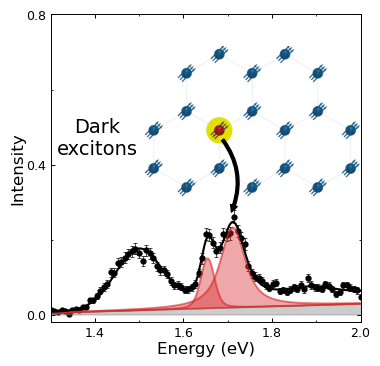

In [41]:
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(4, 4))

color_D1 = 'tab:red'
color_D2 = 'tab:red'
color_background = 'grey'

select = 3
alpha = 0.4
markersize = 3.5
elinewidth = 0.5
capsize = 1.5
capthick = 0.5
H = spectra_thdep_data['H'][select]

x = spectra_thdep_data['E1']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['eloss'][:]/1e3
y = spectra_thdep_data['E1']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['intensity'][:]
yerr = spectra_thdep_data['E1']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['error'][:]


ax.errorbar(x, y, yerr=yerr,marker='o', fillstyle='full', color='k', ls='',markersize=markersize,
            elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=1,zorder=0)

x = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['x'][:]/1e3
y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['y'][:]
ax.plot(x, y,'-',color='k',zorder=2)

background = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['bckg'][:]
ax.plot(x, background,'-',zorder=1, alpha=alpha, color=color_background,)
ax.fill_between(x, background, y2=0, alpha=alpha, color=color_background,)

y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['peak1'][:]
ax.plot(x, y+background,'-',color=color_D1,zorder=1, alpha=alpha)
ax.fill_between(x, y+background, y2=background, color=color_D1, alpha=alpha)
y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['peak2'][:]
ax.plot(x, y+background,'-',color=color_D2,zorder=1, alpha=alpha)
ax.fill_between(x, y+background, y2=background, color=color_D2, alpha=alpha)


# axis range and ticks
ax.set_xlim(1.3, 2.)
ax.set_ylim(-0.02, 0.7)
ax.set_xticks(np.arange(1.4, 2, 0.2))
ax.set_yticks(np.arange(0, 0.801, 0.4))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# axis label
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Intensity')


axin = ax.inset_axes([0.3, 0.3, 0.7, 0.7])
im = plt.imread('excitons.png')
axin.imshow(im)
axin.axis('off')


# add the arrow
arrow = patches.FancyArrowPatch(
    (0.55, 0.6),
    (0.58, 0.35),
    connectionstyle='arc3, rad=-0.3',
    mutation_scale=10,
    facecolor='k',
    edgecolor='k',
    clip_on=False,
)
newax = fig.add_axes(ax.get_position(), frameon=False)
newax.add_patch(arrow)
newax.axis('off')

newax.text(x=0.15, y=0.60, s='Dark\nexcitons', va='center', ha='center', fontsize=14, transform=ax.transAxes, )


#plt.subplots_adjust(left=0.12, right=0.95, bottom=0.09, top=0.99, wspace=0, hspace=0)
fig.savefig('PRX_key_image.png', dpi=100)